In [1]:
!wget https://os.unil.cloud.switch.ch/fma/fma_medium.zip


--2025-12-03 13:15:14--  https://os.unil.cloud.switch.ch/fma/fma_medium.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.16, 2001:620:5ca1:201::214
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23825005356 (22G) [application/zip]
Saving to: ‘fma_medium.zip’

fma_medium.zip      100%[===================>]  22.19G  83.4MB/s    in 7m 4s   

2025-12-03 13:22:18 (53.6 MB/s) - ‘fma_medium.zip’ saved [23825005356/23825005356]



In [2]:
!unzip fma_medium.zip -d fma_medium/


Streaming output truncated to the last 5000 lines.
 bunzipping: fma_medium/fma_medium/032/032876.mp3  
 bunzipping: fma_medium/fma_medium/032/032879.mp3  
 bunzipping: fma_medium/fma_medium/032/032880.mp3  
 bunzipping: fma_medium/fma_medium/032/032881.mp3  
 bunzipping: fma_medium/fma_medium/032/032882.mp3  
 bunzipping: fma_medium/fma_medium/032/032883.mp3  
 bunzipping: fma_medium/fma_medium/032/032895.mp3  
 bunzipping: fma_medium/fma_medium/032/032900.mp3  
 bunzipping: fma_medium/fma_medium/032/032915.mp3  
 bunzipping: fma_medium/fma_medium/032/032956.mp3  
 bunzipping: fma_medium/fma_medium/032/032958.mp3  
 bunzipping: fma_medium/fma_medium/032/032959.mp3  
 bunzipping: fma_medium/fma_medium/032/032962.mp3  
 bunzipping: fma_medium/fma_medium/032/032987.mp3  
 bunzipping: fma_medium/fma_medium/033/033012.mp3  
 bunzipping: fma_medium/fma_medium/033/033017.mp3  
 bunzipping: fma_medium/fma_medium/033/033018.mp3  
 bunzipping: fma_medium/fma_medium/033/033020.mp3  
 bunzipping: 

In [4]:
!pip install librosa pydub
!apt-get install ffmpeg



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [3]:
DATASET_DIR = "/content/fma_medium/fma_medium"

In [5]:
import os
import librosa
from IPython.display import Audio

mp3_files = []
for root, dirs, files in os.walk(DATASET_DIR):
    for file in files:
        if file.lower().endswith(".mp3"):
            mp3_files.append(os.path.join(root, file))

print("Total mp3 files:", len(mp3_files))

Total mp3 files: 10342


In [6]:
audio_path = mp3_files[1]
print("Loading:", audio_path)

audio, sr = librosa.load(audio_path, sr=None,mono=False)
print("Shape:", audio.shape, "Sample Rate:", sr)

Audio(audio_path)

Loading: /content/fma_medium/fma_medium/014/014795.mp3
Shape: (2, 1321967) Sample Rate: 44100


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


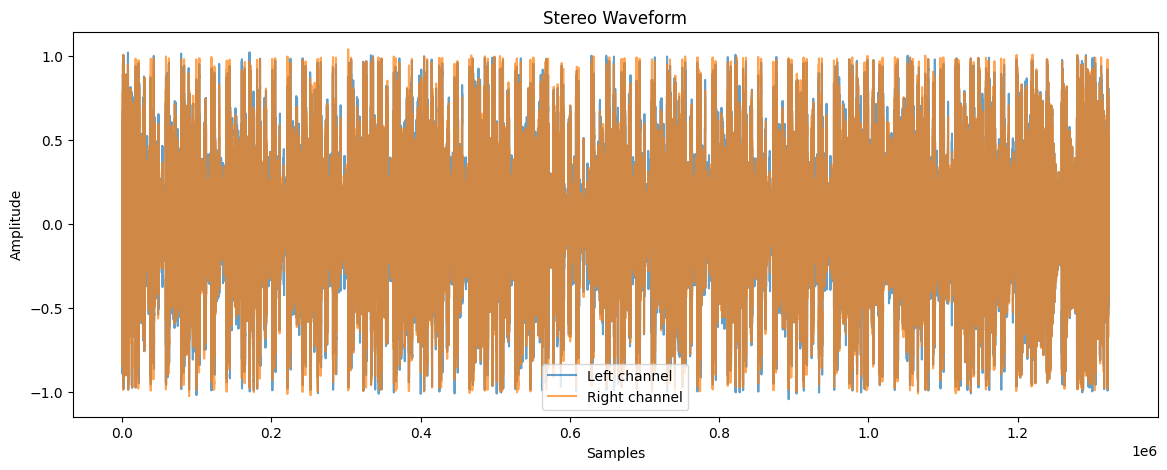

In [7]:
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.title("Stereo Waveform")
plt.plot(audio[0], label="Left channel", alpha=0.7)
plt.plot(audio[1], label="Right channel", alpha=0.7)
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()
